## To predict who is more likely to click the ad

In [92]:
#importing libraries
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split #library to split dataset into train & test data
import seaborn as sns
from sklearn.metrics import accuracy_score #to find accuracy of model

In [2]:
#importing dataset
data = pd.read_csv("advertising.csv")

In [94]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [41]:
#dropping column which is not required ex:many diff text datas
dt = data.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp'], axis=1)

In [42]:
dt.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


Text(0.5, 0, 'sex')

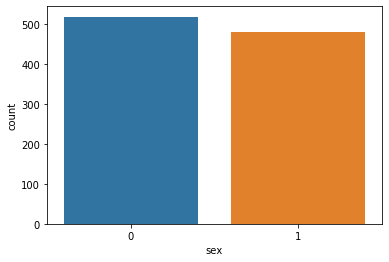

In [43]:
sns.countplot(dt.Male)
plt.xlabel('sex')

Text(0.5, 0, 'sex')

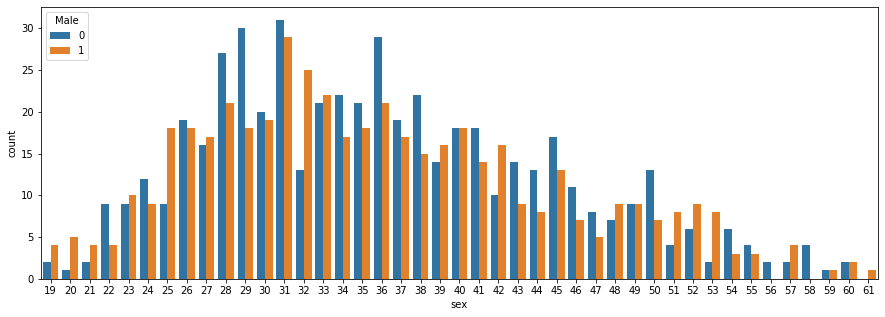

In [44]:
plt.figure(figsize=(15, 5))
sns.countplot(dt.Age, hue=dt.Male)
plt.xlabel('sex')

In [49]:
#splitting datasets into x (independent) & y (dependent)
x = dt.drop(['Clicked on Ad'], axis=1)
y = dt['Clicked on Ad']

In [78]:
#splitting data sets into training and testing
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=0)

In [79]:
#fiting training data into model
model = LogisticRegression()
model.fit(train_x, train_y)

C:\Users\RAHUL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
#predicting the model 
y_pred = model.predict(test_x)

In [89]:
accuracy = accuracy_score(y_pred, test_y)

In [91]:
print("Model Accuracy:",accuracy)

Model Accuracy: 0.915
